In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import measure, color
from os import listdir 

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

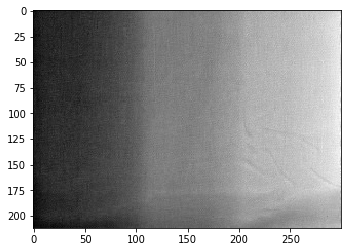

In [6]:
im_color = cv2.imread("color.jpg")
im_green = im_color[:,:,1]
plt.imshow(im_green)

In [21]:
mu_x,mu_y = 0
x,y = [x+2,y+1]
print(x,y)

TypeError: 'int' object is not iterable

top left:  [90 30]
btm right:  [120  60]
half window size:  15 15


top left:  [105  44]
btm right:  [135  74]


top left:  [119  59]
btm right:  [149  89]


top left:  [134  73]
btm right:  [164 103]


top left:  [148  88]
btm right:  [178 118]


top left:  [163 102]
btm right:  [193 132]


top left:  [178 117]
btm right:  [208 147]


top left:  [193 131]
btm right:  [223 161]


top left:  [208 146]
btm right:  [238 176]


top left:  [222 160]
btm right:  [252 190]


top left:  [237 174]
btm right:  [267 204]


top left:  [251 188]
btm right:  [281 218]


top left:  [266 200]
btm right:  [296 230]


top left:  [281 205]
btm right:  [311 235]


top left:  [290 208]
btm right:  [320 238]


top left:  [294 210]
btm right:  [324 240]


top left:  [297 210]
btm right:  [327 240]


top left:  [298 211]
btm right:  [328 241]


top left:  [298 211]
btm right:  [328 241]


None


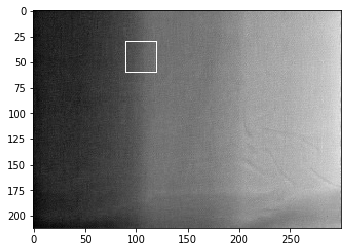

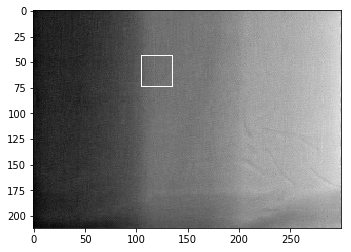

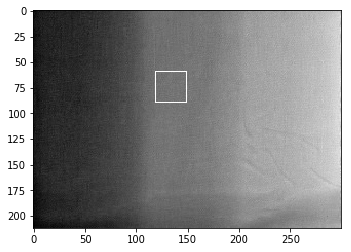

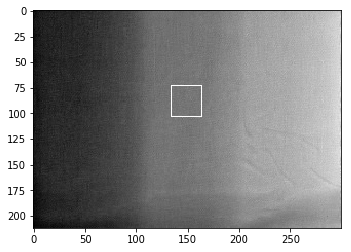

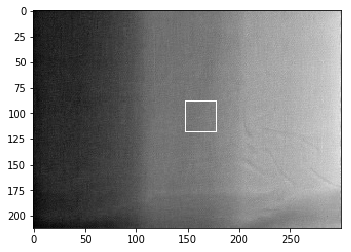

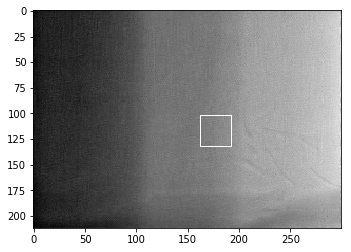

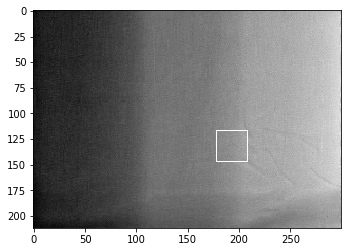

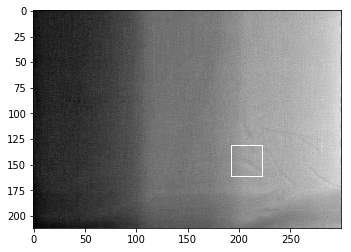

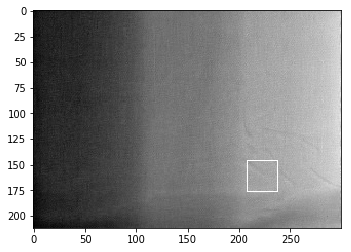

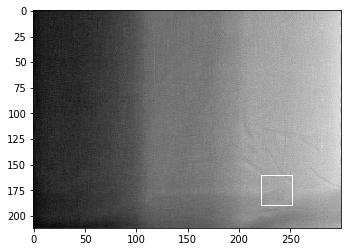

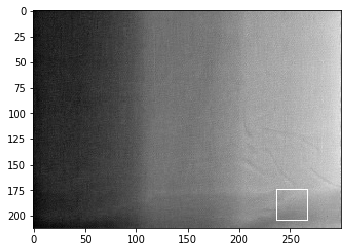

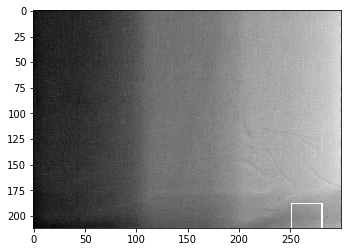

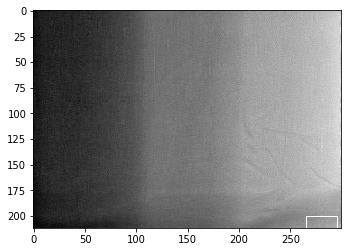

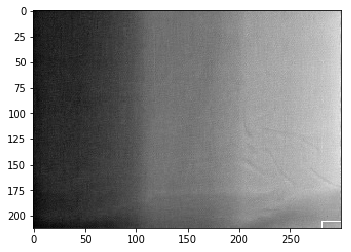

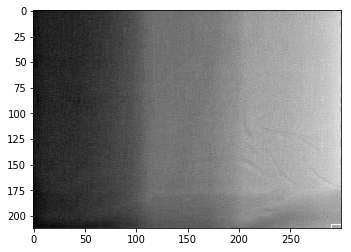

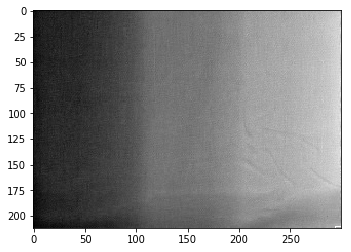

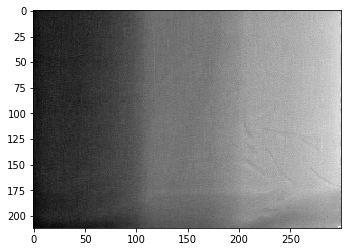

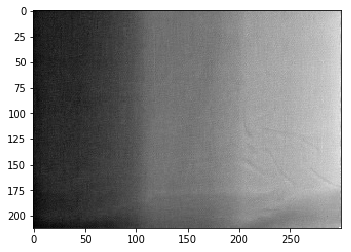

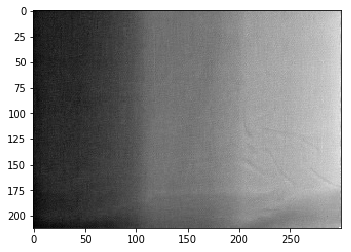

In [23]:
def mean_shift(im, tl, br):
    
    # tl[0] = top left x coordinate
    # tl[1] = top left y coordinate
    # br[0] = btm right x coordinate
    # br[1] = btm right y coordinate
        
    # window size
    hw = np.int(np.abs((tl[1] - br[1]) / 2))
    hh = np.int(np.abs((tl[1] - br[1]) / 2))
    #print("window size: ", hw, hh)
    
    print("top left: ", tl)
    print("btm right: ", br)
    print("half window size: ", hw, hh)
    print("\n")
    
    # initialize position to be center of the window
    old_centroid = np.array([0,0]).astype(int)
    new_centroid = np.array([(tl[0] + br[0]) / 2, (tl[1] + br[1]) / 2]).astype(int)
    
    # show initial position
    im_copy = np.copy(im)
    cv2.rectangle(im_copy, (tl[0],tl[1]), (br[0], br[1]), (255,255,255) ,1)
    plt.figure()
    plt.imshow(im_copy)
    
    # while there is still update in the positions
    while(old_centroid[0] != new_centroid[0] and old_centroid[1] != new_centroid[1]):
     
        old_centroid = new_centroid

        # extract sub image
        sub_im = im[tl[1]:br[1], tl[0]:br[0]]
        
        # compute mean weighted by pixel intensities
        yy, xx = np.nonzero(sub_im)  
        mu_x = 0
        mu_y = 0
        for y,x in zip(yy,xx):
            mu_x,mu_y = [mu_x + x*sub_im[y,x], mu_y + y*sub_im[y,x]]
        mu_x /= np.sum(sub_im)
        mu_y /= np.sum(sub_im)
        
        # move centroid to new location
        new_centroid = new_centroid + np.array([mu_x, mu_y])
        
        # update top left and bottom right windows
        tl[0] = max(new_centroid[0] - hw,0)
        tl[1] = max(new_centroid[1] - hh,0)
        br[0] = max(new_centroid[0] + hw,0)
        br[1] = max(new_centroid[1] + hh,0)
        
        im_copy = np.copy(im)
        cv2.rectangle(im_copy, (tl[0],tl[1]), (br[0], br[1]), (255,255,255) ,1)
        plt.figure()
        plt.imshow(im_copy)
    
        print("top left: ", tl)
        print("btm right: ", br)
        print("\n")
    
print(mean_shift(im_green, np.array([90,30]), np.array([120,60])))